# Title:  EDA Project - AMCAT Data Analysis

# Step - 1 - Introduction


 **1.1 Problem Statement**:
 
The employability of engineering graduates has been a topic of significant concern in recent years, with organizations often reporting skill gaps among fresh graduates. The Aspiring Minds Employment Outcome 2015 (AMEO) dataset aims to analyze the employment outcomes of engineering graduates based on their skills, academic performance, and demographic factors. The dataset provides insights into how various cognitive, technical, and personality skills influence employment factors such as salary, job title, and job location.

*The goal of this Exploratory Data Analysis (EDA) is to understand the factors that impact `salary` and employment outcomes.*

  **1.2 Data Description**
The dataset consists of 3998 engineering graduates with 38 independent variables (features) and 1 dependent variable (Salary in INR). The dataset contains both continuous and categorical variables. Below is a breakdown of the key features in the dataset:

**1.Candidate Information**:

+ `candidate_id`: Unique identifier for each candidate
+ `gender`: Candidate's gender
+ `date_of_birth`: Candidate's birthdate


**2.Employment Details**:

+ `salary_inr`: (Target Variable) Salary of the candidate in Indian Rupees
+ `designation`: Job title assigned after employment
+ `job_city`: Location of the job
+ `date_of_joining`: Date the candidate joined the company
+ `date_of_leaving`: If applicable, the date the candidate left the company

**3.Academic Performance**:

+ `percentage_10`, `board_10`: 10th-grade percentage and education board
+ `percentage_12`, `board_12`: 12th-grade percentage and education board
+ `graduation_12_year`: Year of high school graduation
+ `college_gpa`: GPA obtained in college
+ `college_id`: Unique identifier for the college
+ `college_tier`: Tier classification of the college (e.g., Tier 1, Tier 2, Tier 3)
+ `degree`: Degree obtained by the candidate
+ `specialization`: Field of specialization
+ `college_city_id`, `college_city_tier`, `college_state`: Location details of the college
+ `graduation_year`: Year of graduation

**4.Standardized Skill Scores (AMCAT Scores)**:
The dataset includes scores from the Aspiring Minds Computer Adaptive Test (AMCAT), which assesses:

+ `Cognitive Skills`:  amcat_english_score,
                       amcat_logical_score
                       amcat_quant_score
+ `Technical Skills`:  amcat_domain_score,
                       amcat_computer_programming_score,
                       amcat_electronics_score,
                       amcat_computer_science_score,
                       amcat_mechanical_engineering_score,
                       amcat_electrical_engineering_score,
                       amcat_telecom_engineering_score,
                       amcat_civil_engineering_score


**5.Personality Traits (Big Five Personality Traits Model)**:

+ `personality_conscientiousness`
+ `personality_agreeableness`
+ `personality_extraversion`
+ `personality_neuroticism`
+ `personality_openness_to_experience`

**1.3 Objective of the Analysis**
The main objective of this EDA is to analyze the employment trends of engineering graduates and determine the key factors influencing salary. The specific goals include:


**1.Understanding Salary Distribution**:

+ Visualizing salary distribution across different job locations, designations, and college tiers
+ Identifying any outliers or extreme salary values

**2.Analyzing the Impact of Academic Performance**:

+ Investigating how 10th, 12th, and college GPA influence salary outcomes
+ Identifying trends based on the college tier and graduation year

**3.Assessing the Role of AMCAT Scores**:

+ Evaluating the correlation between cognitive, technical, and domain-specific scores and salary
+ Determining which AMCAT scores contribute the most to higher salaries

**4.Examining the Influence of Personality Traits**:

+ Analyzing whether personality factors impact salary levels
+ Identifying patterns in personality traits across different salary groups

**5.Identifying Trends Based on Demographics**:

+ Exploring gender-based salary disparities
+ Analyzing salary variations across different job locations and specializations

# Step - 2 - Data Collection


Based on the problem statement, we will gather the dataset required for this analysis. The dataset is sourced from Aspiring Minds Employment Outcome 2015 (AMEO), which provides insights into the employment outcomes of engineering graduates.

This dataset comprises 3998 data points (rows) and 38 independent variables (features), categorized into:

+ Demographic Details (e.g., gender, date of birth, job location)
+ Academic Performance (e.g., 10th & 12th-grade scores, college GPA, graduation year)
+ Standardized Skill Scores (AMCAT Scores) (e.g., cognitive, technical, and domain-specific skills)
+ Personality Traits (e.g., conscientiousness, extraversion, openness to experience)

The target variable for this analysis is `salary_inr`, representing the salary earned by the candidates.

*Data Sources*:                                                                       
✅ CSV files – Commonly used for structured tabular data                                                                   
✅ Excel Files – Frequently used in HR and employment-related data collection


# Step - 3 - Simple EDA


In this stage, we will perform an initial assessment of the dataset to determine whether the collected data is raw or cleaned.




### 1.1 Import the data 
* Import necessary libraries
* load data-set

`Raw Data`
If the dataset contains any of the following issues, it is considered raw data:

+ Missing Values (NaN) – Some records may have missing entries for certain columns.
+ Duplicate Records – If multiple rows contain identical data, it may indicate redundancy.
+ Inconsistent Data – Mismatched formats, incorrect data types, or unexpected values.
+ Outliers – Extreme or unrealistic values that may affect the analysis.


`Cleaned Data`
A dataset is considered clean when:  
✔ No missing values are present.
✔ No duplicate entries exist.
✔ The data is consistent and correctly formatted.
✔ The values are within a reasonable range for analysis.










In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [ ]:
# load data set

In [51]:
data= pd.read_csv(r"C:\Data_Analysis_intern-online_jan_march_IRL_2025\task-4\EDA Project - AMCAT Data Analysis.csv")

In [53]:
# Display the first 5 rows of the dataset
print("First 5 Rows of the Dataset:")
display(data.head(5))

First 5 Rows of the Dataset:


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [96]:
# Display the shape of the dataset (number of rows and columns)
print("\nShape of the Dataset:")
print(data.shape)


Shape of the Dataset:
(3998, 39)


In [104]:
# Display dataset information
print("Dataset Information:")
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-nul

In [106]:
# Display all column names in the dataset
print("Column Names in the Dataset:")
print(data.columns)

Column Names in the Dataset:
Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [100]:
# Display summary statistics of numerical columns
print("\nStatistical Summary of Numerical Columns:")
display(data.describe())


Statistical Summary of Numerical Columns:


,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Key Observations

### 1. Salary Distribution  
- The salary ranges from **₹35,000** to **₹4,000,000**.  
- The **median salary** is **₹300,000**, indicating that half of the graduates earn below this amount.

### 2. Academic Performance  
- Students generally perform well in **10th grade** (**mean = 77.93%**) and **12th grade** (**mean = 74.47%**).  

### 3. College Tier  
- Most colleges belong to **Tier 2**, as the mean college tier is around4**1**.

### 5. Engineering Specializations  
- **Computer Science** has the **highest average score (90.742)**.  
- **Civil Engineering** has the **lowest average score (2.684)**.


In [114]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [116]:
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [120]:
# Check for duplicate records
duplicate_records = data.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicate_records)


Number of Duplicate Records: 0


In [124]:
data[data.duplicated(keep=False)]

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


### Gender Distribution (Countplot)

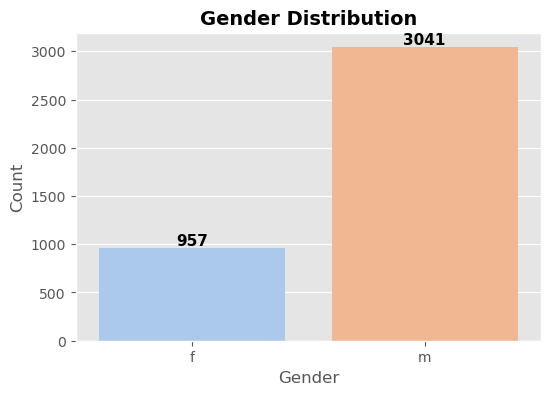

In [133]:
# Set the plot style
plt.style.use('ggplot')

# Create the countplot
plt.figure(figsize=(6, 4))  # Adjust figure size
ax = sns.countplot(x='Gender', data=data, palette="pastel")

# Add title and axis labels
plt.title("Gender Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add annotations (value labels on top of bars)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=11, fontweight="bold")

# Show the plot
plt.show()


**Key Observations**:
+ The dataset shows a significant gender imbalance in the engineering graduates' employment outcomes.
+ A total of 957 females and 3041 males are represented in the dataset.
+ The male graduates outnumber the female graduates by a ratio of approximately 1:3.
+ The gender distribution may influence salary and other employment outcomes, and further analysis can help explore if these differences are significant in the context of job roles, locations, or salaries.

### univarite Box-Plot on salary

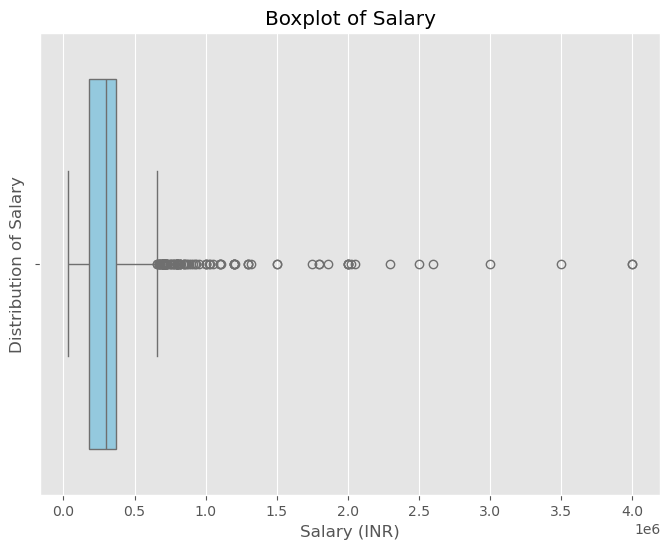

In [154]:

plt.figure(figsize=(8, 6))

# Add title and axis labels
plt.title("Boxplot of Salary", fontsize=16, fontweight='bold')
plt.xlabel("Salary (INR)", fontsize=12)
plt.ylabel("Distribution of Salary", fontsize=12)

sns.boxplot(x='Salary', data=data,color='skyblue')
plt.title("Boxplot of Salary")
plt.show()


**Key Observations**:

+ Outliers for salary can be seen as points beyond the whiskers.                                                           + 
This can help identify extreme cases in salary offers.

###  Create a violin plot for salary distribution by gender

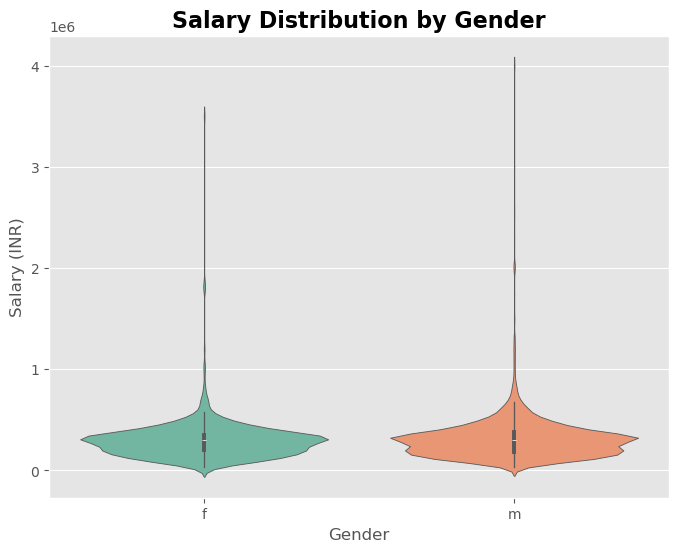

In [166]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Salary', data=data, palette="Set2")

# Add title and axis labels
plt.title("Salary Distribution by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Salary (INR)", fontsize=12)

# Show the plot
plt.show()


### Key Observations from the Violin Plot:
- For **females**, salary distribution (≤ 6 LPA) ranges from **0 to 3.75 LPA**.
- For **males**, salary distribution (≤ 6 LPA) ranges from **0 to 4.2 LPA**.


# Step - 4 - Pre-Processing:
 It converts raw data into cleaned data. Our collected data is already cleaned, which means we can skip this stage.

In [55]:
data.head(2)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637


In [ ]:
# i have remove unwanted columns has Unnamed 

In [57]:
data= data.iloc[:,1:]

In [59]:
data.head(3)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721


In [ ]:
# i have columns names change it's my option it is not accurate

In [61]:
# before 
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [63]:
# after columns
data.columns= [
    "candidate_id", "salary_inr", "date_of_joining", "date_of_leaving", "designation",
    "job_city", "gender", "date_of_birth", "percentage_10", "board_10",
    "graduation_12_year", "percentage_12", "board_12", "college_id", "college_tier",
    "degree", "specialization", "college_gpa", "college_city_id", "college_city_tier",
    "college_state", "graduation_year", "amcat_english_score", "amcat_logical_score",
    "amcat_quant_score", "amcat_domain_score", "amcat_computer_programming_score",
    "amcat_electronics_score", "amcat_computer_science_score",
    "amcat_mechanical_engineering_score", "amcat_electrical_engineering_score",
    "amcat_telecom_engineering_score", "amcat_civil_engineering_score",
    "personality_conscientiousness", "personality_agreeableness",
    "personality_extraversion", "personality_neuroticism",
    "personality_openness_to_experience"
]

In [65]:
data.columns

Index(['candidate_id', 'salary_inr', 'date_of_joining', 'date_of_leaving',
       'designation', 'job_city', 'gender', 'date_of_birth', 'percentage_10',
       'board_10', 'graduation_12_year', 'percentage_12', 'board_12',
       'college_id', 'college_tier', 'degree', 'specialization', 'college_gpa',
       'college_city_id', 'college_city_tier', 'college_state',
       'graduation_year', 'amcat_english_score', 'amcat_logical_score',
       'amcat_quant_score', 'amcat_domain_score',
       'amcat_computer_programming_score', 'amcat_electronics_score',
       'amcat_computer_science_score', 'amcat_mechanical_engineering_score',
       'amcat_electrical_engineering_score', 'amcat_telecom_engineering_score',
       'amcat_civil_engineering_score', 'personality_conscientiousness',
       'personality_agreeableness', 'personality_extraversion',
       'personality_neuroticism', 'personality_openness_to_experience'],
      dtype='object')

In [67]:
data.shape

(3998, 38)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   candidate_id                        3998 non-null   int64  
 1   salary_inr                          3998 non-null   float64
 2   date_of_joining                     3998 non-null   object 
 3   date_of_leaving                     3998 non-null   object 
 4   designation                         3998 non-null   object 
 5   job_city                            3998 non-null   object 
 6   gender                              3998 non-null   object 
 7   date_of_birth                       3998 non-null   object 
 8   percentage_10                       3998 non-null   float64
 9   board_10                            3998 non-null   object 
 10  graduation_12_year                  3998 non-null   int64  
 11  percentage_12                       3998 no

### type conversion

In [151]:
data["date_of_joining"]=pd.to_datetime(data["date_of_joining"]) # type conversion

In [153]:
data["date_of_birth"]= pd.to_datetime(data["date_of_birth"])

In [155]:
data["graduation_12_year"] = pd.to_datetime(data["graduation_12_year"])

In [157]:
data["graduation_year"] = pd.to_datetime(data["graduation_year"])

In [187]:
data["date_of_leaving"] = pd.to_datetime(data["date_of_leaving"].replace("present", pd.NaT))

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   candidate_id                        3998 non-null   int64         
 1   salary_inr                          3998 non-null   float64       
 2   date_of_joining                     3998 non-null   datetime64[ns]
 3   date_of_leaving                     2123 non-null   datetime64[ns]
 4   designation                         3998 non-null   object        
 5   job_city                            3998 non-null   object        
 6   gender                              3998 non-null   object        
 7   date_of_birth                       3998 non-null   datetime64[ns]
 8   percentage_10                       3998 non-null   float64       
 9   board_10                            3998 non-null   object        
 10  graduation_12_year      

In [35]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

candidate_id                          0
salary_inr                            0
date_of_joining                       0
date_of_leaving                       0
designation                           0
job_city                              0
gender                                0
date_of_birth                         0
percentage_10                         0
board_10                              0
graduation_12_year                    0
percentage_12                         0
board_12                              0
college_id                            0
college_tier                          0
degree                                0
specialization                        0
college_gpa                           0
college_city_id                       0
college_city_tier                     0
college_state                         0
graduation_year                       0
amcat_english_score                   0
amcat_logical_score                   0
amcat_quant_score                     0


In [37]:
# Check for duplicate records
duplicate_records = data.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicate_records)


Number of Duplicate Records: 0


In [192]:
categorical_cols = [
    "designation", "job_city", "gender", "board_10", "board_12",
    "degree", "specialization", "college_state"
]

In [194]:
integer_cols = [
    "candidate_id","college_id","college_tier",
    "college_city_id", "college_city_tier",
    "amcat_english_score", "amcat_logical_score", "amcat_quant_score",
    "amcat_computer_programming_score", "amcat_electronics_score",
    "amcat_computer_science_score", "amcat_mechanical_engineering_score",
    "amcat_electrical_engineering_score", "amcat_telecom_engineering_score",
    "amcat_civil_engineering_score"
]

In [196]:
float_cols = [
    "salary_inr",
    "percentage_10", "percentage_12", "college_gpa", "amcat_domain_score",
    "personality_conscientiousness", "personality_agreeableness",
    "personality_extraversion", "personality_neuroticism",
    "personality_openness_to_experience"
]

In [198]:
data.head(5)

,candidate_id,salary_inr,date_of_joining,date_of_leaving,designation,job_city,gender,date_of_birth,percentage_10,board_10,...,amcat_computer_science_score,amcat_mechanical_engineering_score,amcat_electrical_engineering_score,amcat_telecom_engineering_score,amcat_civil_engineering_score,personality_conscientiousness,personality_agreeableness,personality_extraversion,personality_neuroticism,personality_openness_to_experience
0,203097,420000.0,2012-06-01,NaT,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,NaT,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,NaT,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,NaT,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [200]:
data.to_csv("C:\Data_Analysis_intern-online_jan_march_IRL_2025\EDA Project - AMCAT Data Analysis\EDA_files\clean_AMCAT_data.csv", index=False)

## our data is ready for EDA

# Step - 5 - Exploratory Data Analysis:
In this we perform our actual analysis on cleaned data. Here we analyse the data based on PS to get our insights (useful information).

In [202]:
data= pd.read_csv(r"C:\Data_Analysis_intern-online_jan_march_IRL_2025\EDA Project - AMCAT Data Analysis\EDA_files\clean_AMCAT_data.csv")

In [204]:
data.head(3)

,candidate_id,salary_inr,date_of_joining,date_of_leaving,designation,job_city,gender,date_of_birth,percentage_10,board_10,...,amcat_computer_science_score,amcat_mechanical_engineering_score,amcat_electrical_engineering_score,amcat_telecom_engineering_score,amcat_civil_engineering_score,personality_conscientiousness,personality_agreeableness,personality_extraversion,personality_neuroticism,personality_openness_to_experience
0,203097,420000.0,2012-06-01,NaN,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,579905,500000.0,2013-09-01,NaN,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,810601,325000.0,2014-06-01,NaN,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721


In [206]:
df=data.copy()

In [208]:
df.shape

(3998, 38)

In [210]:
df.columns

Index(['candidate_id', 'salary_inr', 'date_of_joining', 'date_of_leaving',
       'designation', 'job_city', 'gender', 'date_of_birth', 'percentage_10',
       'board_10', 'graduation_12_year', 'percentage_12', 'board_12',
       'college_id', 'college_tier', 'degree', 'specialization', 'college_gpa',
       'college_city_id', 'college_city_tier', 'college_state',
       'graduation_year', 'amcat_english_score', 'amcat_logical_score',
       'amcat_quant_score', 'amcat_domain_score',
       'amcat_computer_programming_score', 'amcat_electronics_score',
       'amcat_computer_science_score', 'amcat_mechanical_engineering_score',
       'amcat_electrical_engineering_score', 'amcat_telecom_engineering_score',
       'amcat_civil_engineering_score', 'personality_conscientiousness',
       'personality_agreeableness', 'personality_extraversion',
       'personality_neuroticism', 'personality_openness_to_experience'],
      dtype='object')

In [212]:
df.describe()

,candidate_id,salary_inr,percentage_10,percentage_12,college_id,college_tier,college_gpa,college_city_id,college_city_tier,amcat_english_score,...,amcat_computer_science_score,amcat_mechanical_engineering_score,amcat_electrical_engineering_score,amcat_telecom_engineering_score,amcat_civil_engineering_score,personality_conscientiousness,personality_agreeableness,personality_extraversion,personality_neuroticism,personality_openness_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,501.649075,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,104.940021,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,180.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,425.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,500.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,570.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,875.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# Step - 6 - Univariate Analysis ->

In [3]:
data= pd.read_csv(r"C:\Data_Analysis_intern-online_jan_march_IRL_2025\EDA Project - AMCAT Data Analysis\EDA_files\clean_AMCAT_data.csv")

In [17]:
integer_cols = [
    "candidate_id","college_id","college_tier",
    "college_city_id", "college_city_tier",
    "amcat_english_score", "amcat_logical_score", "amcat_quant_score",
    "amcat_computer_programming_score", "amcat_electronics_score",
    "amcat_computer_science_score", "amcat_mechanical_engineering_score",
    "amcat_electrical_engineering_score", "amcat_telecom_engineering_score",
    "amcat_civil_engineering_score"
]

In [19]:
categorical_cols = [
    "designation", "job_city", "gender", "board_10", "board_12",
    "degree", "specialization", "college_state"
]

In [21]:
float_cols = [
    "salary_inr",
    "percentage_10", "percentage_12", "college_gpa", "amcat_domain_score",
    "personality_conscientiousness", "personality_agreeableness",
    "personality_extraversion", "personality_neuroticism",
    "personality_openness_to_experience"
]

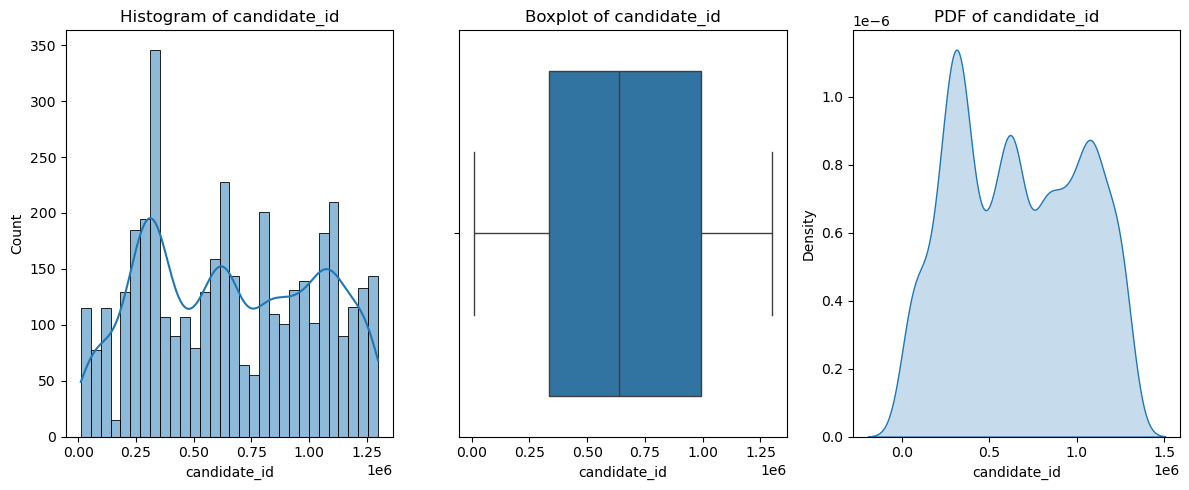

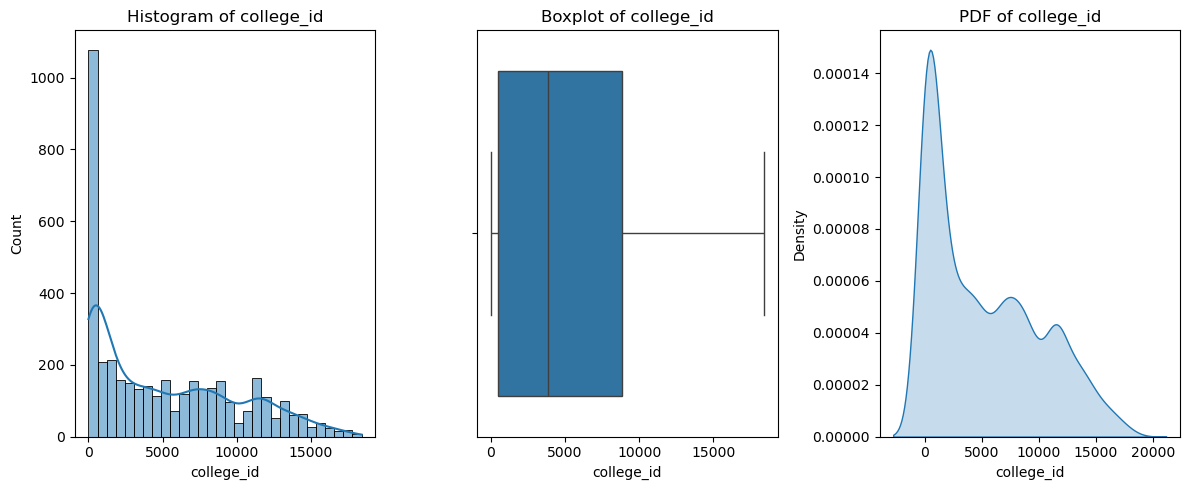

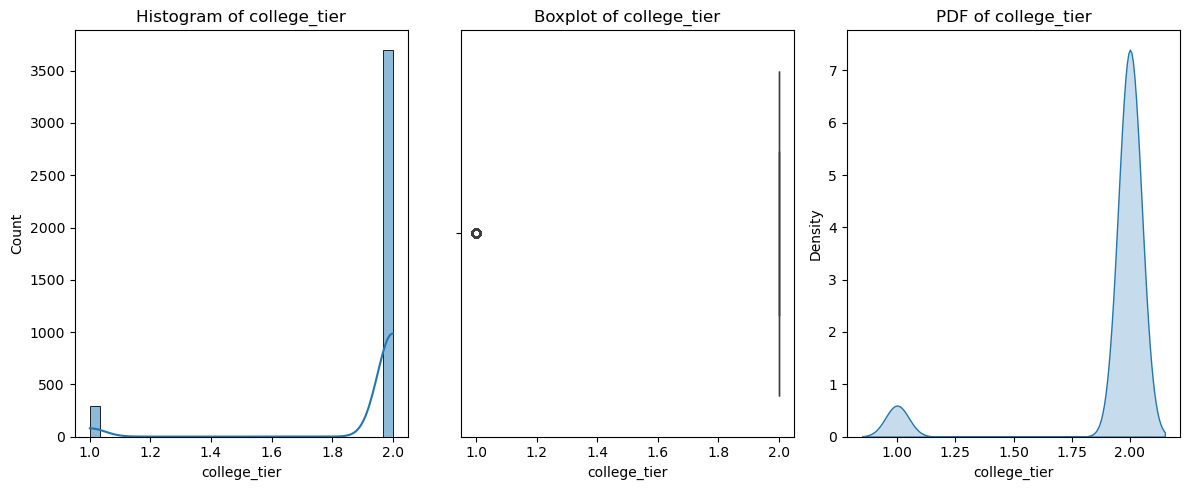

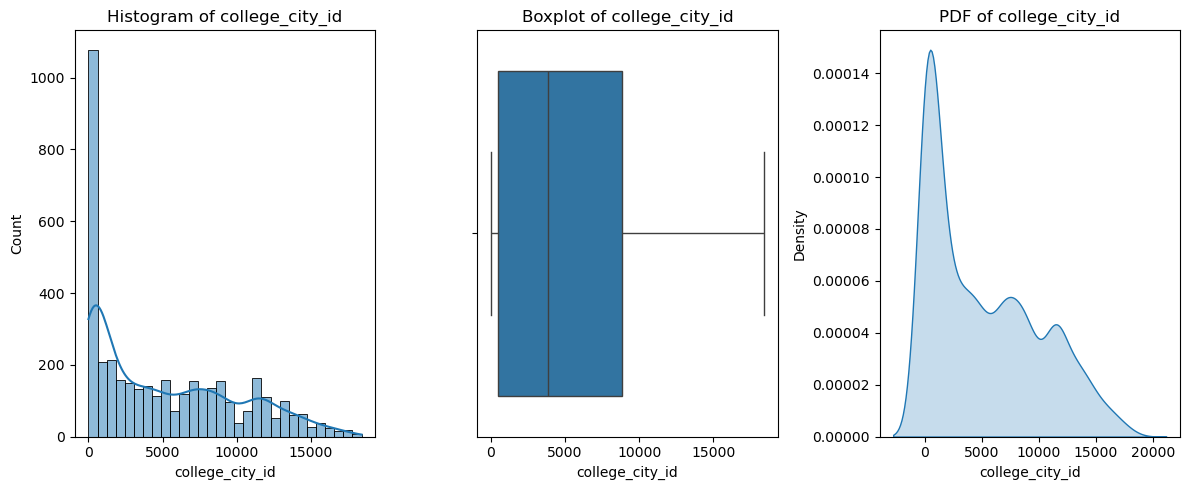

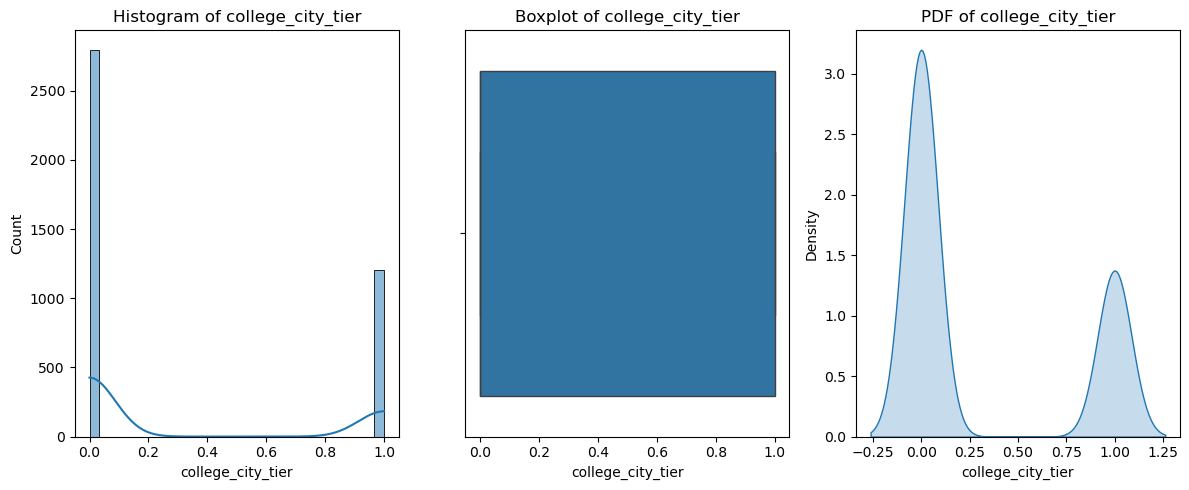

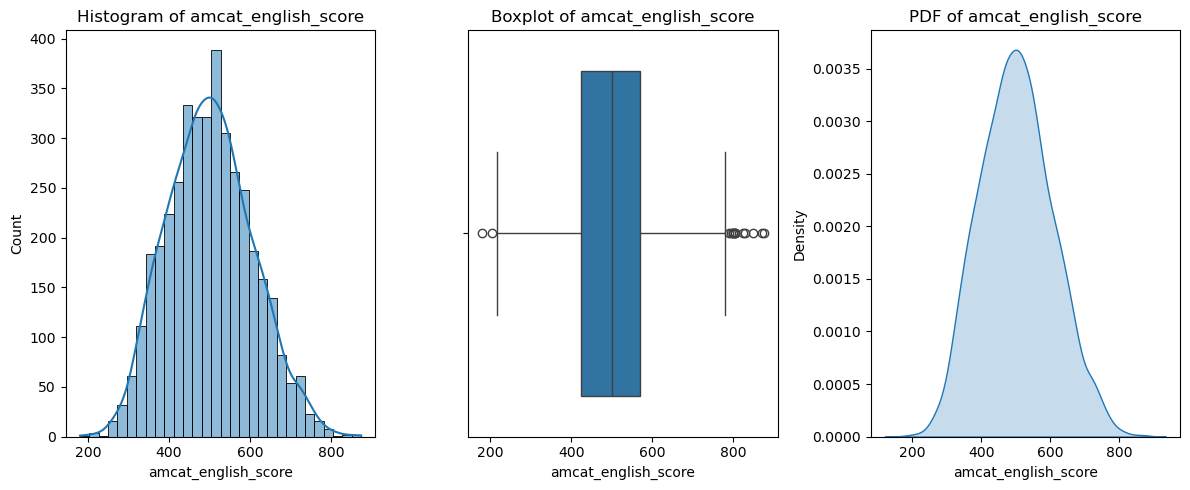

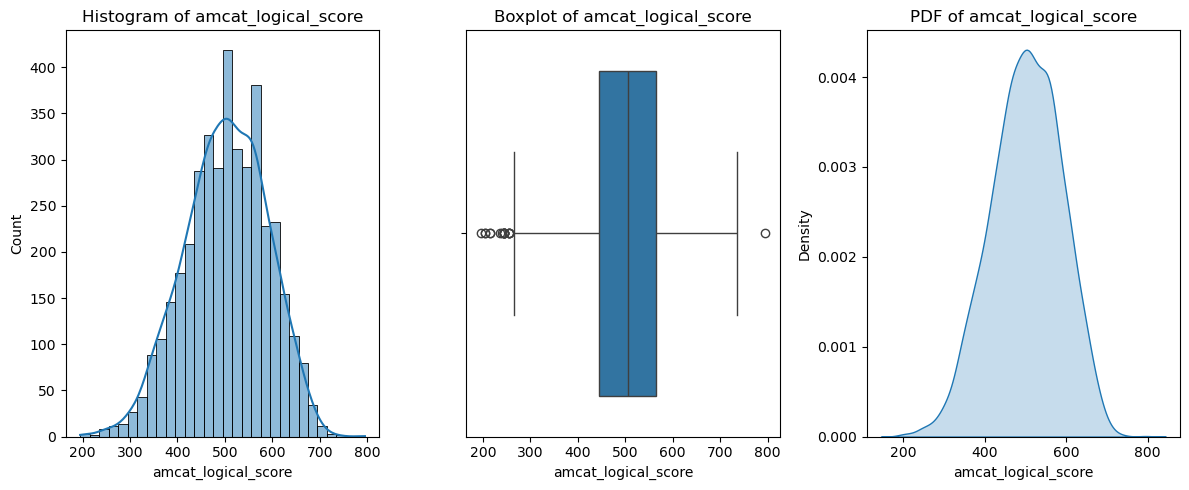

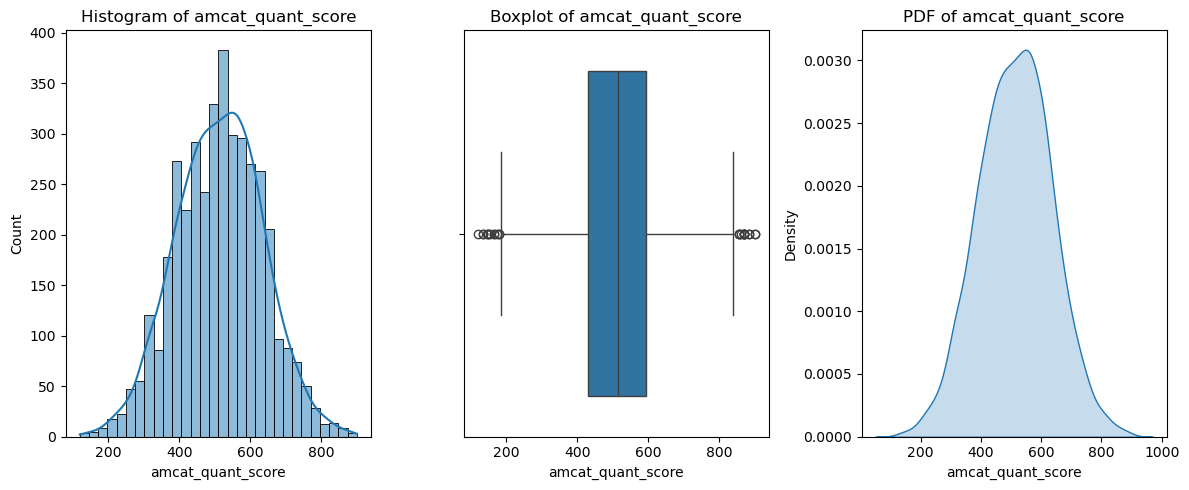

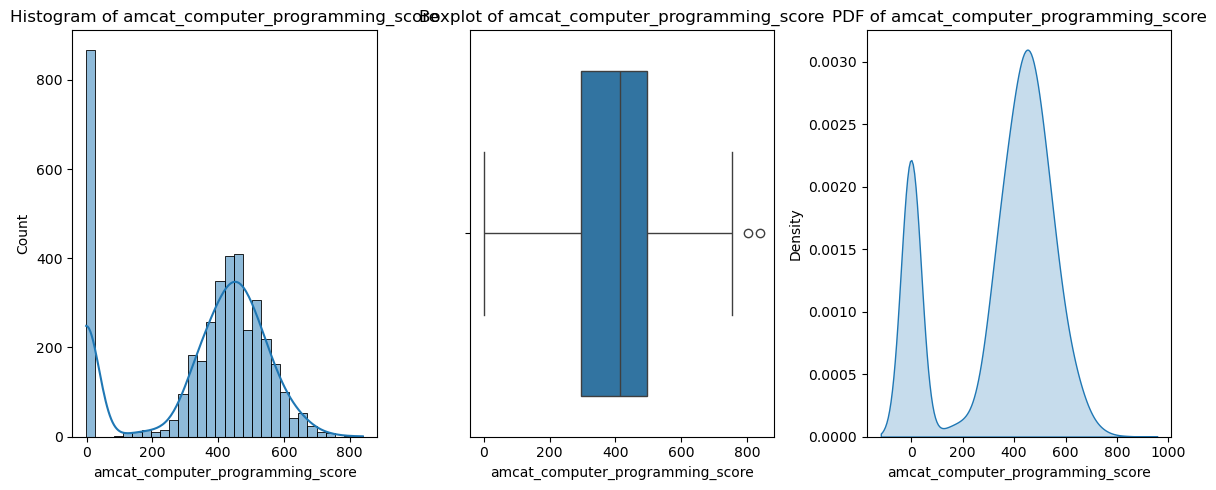

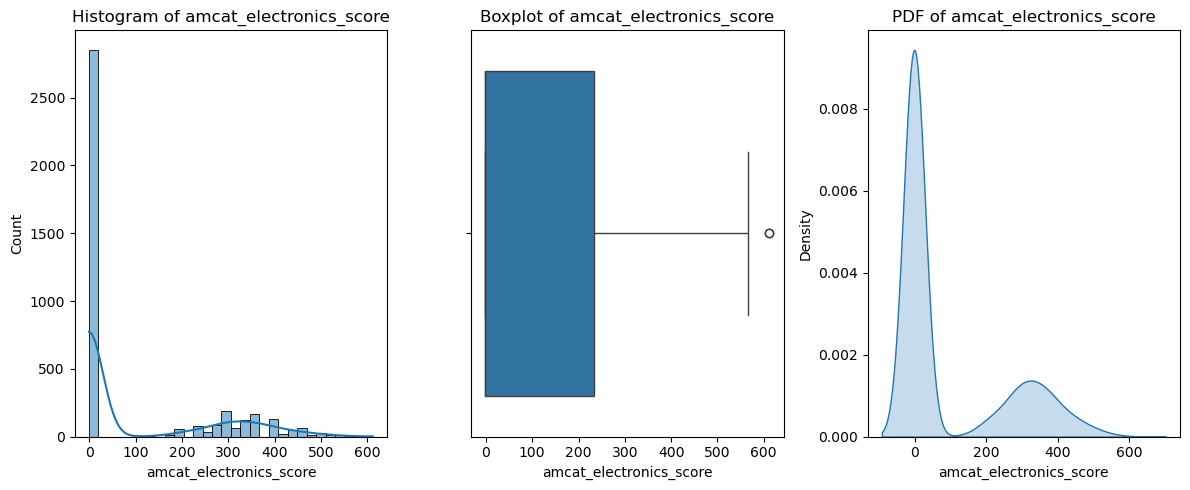

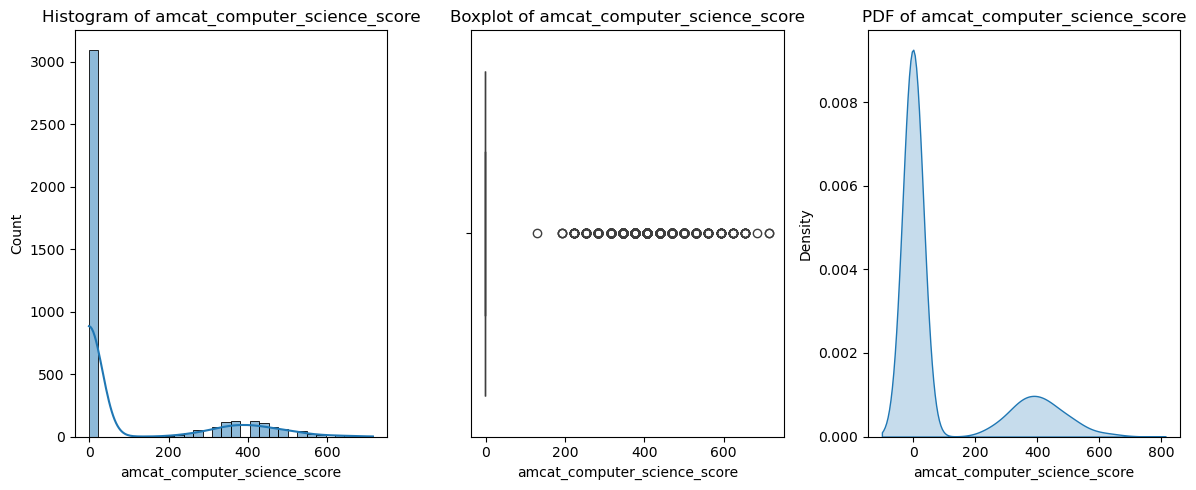

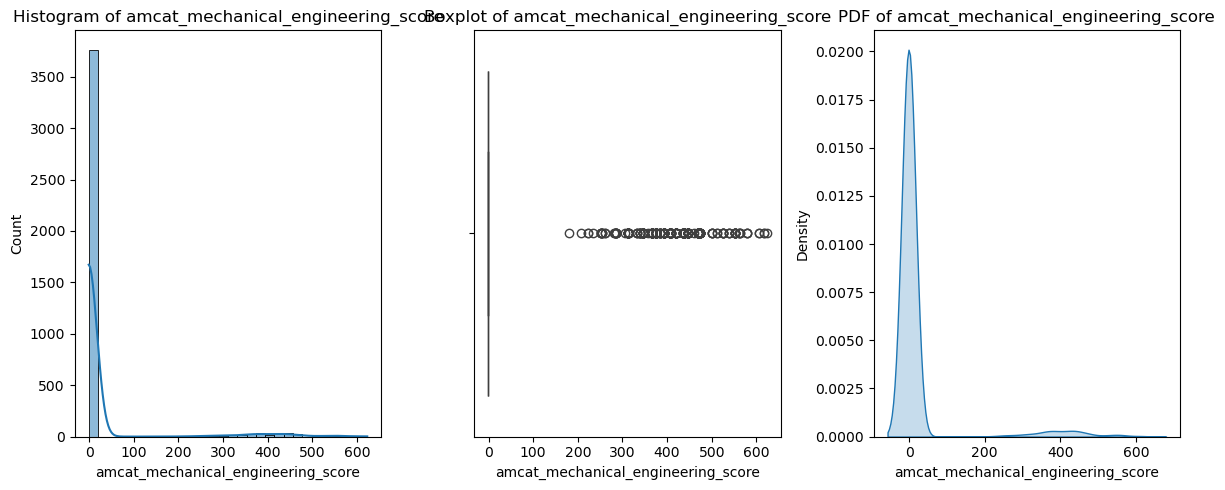

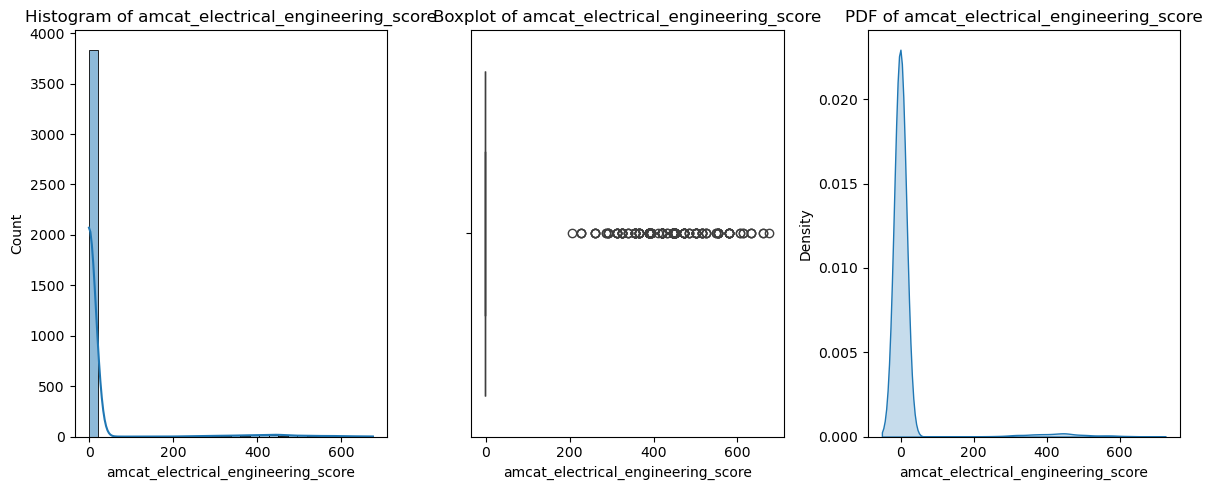

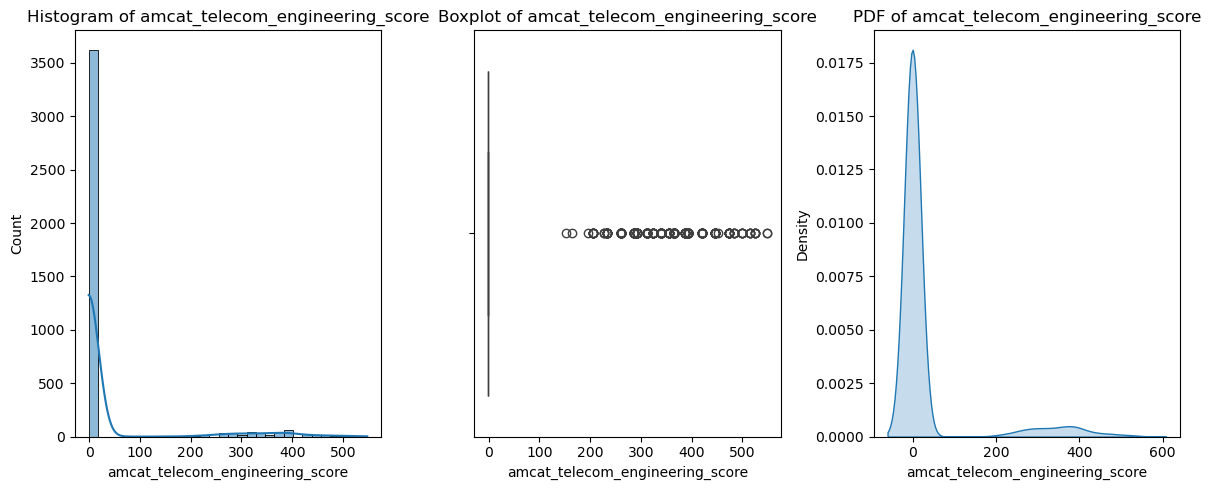

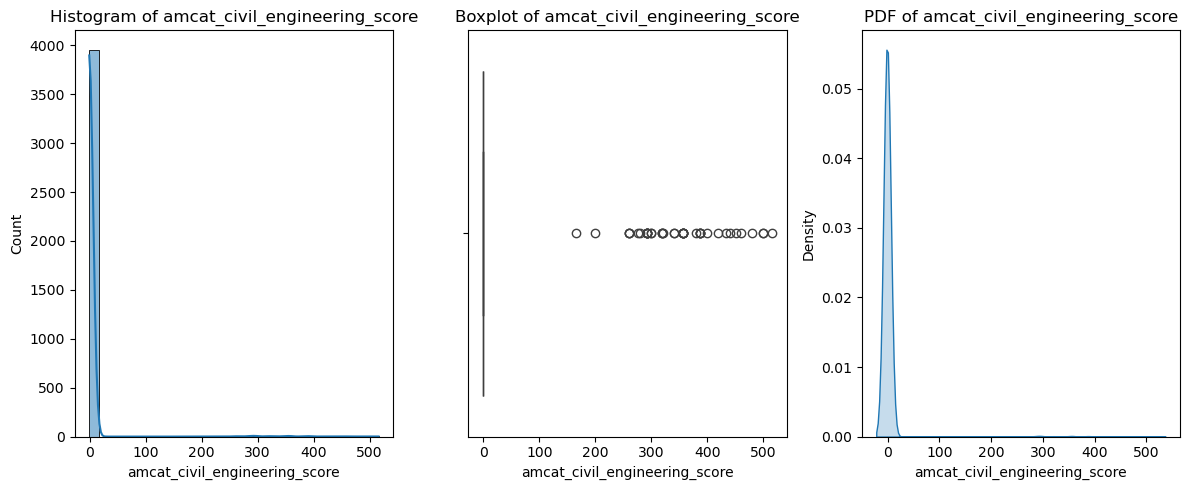

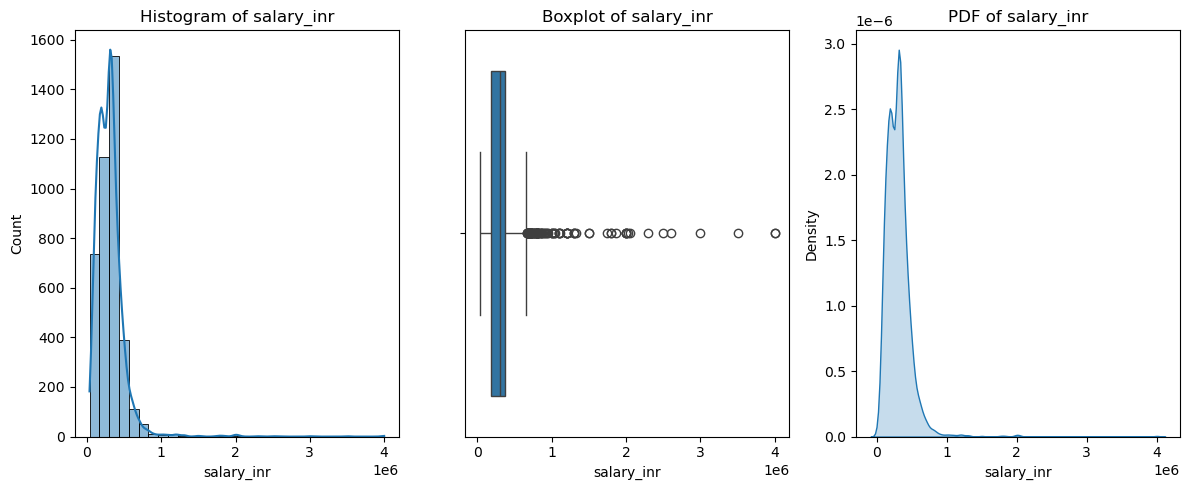

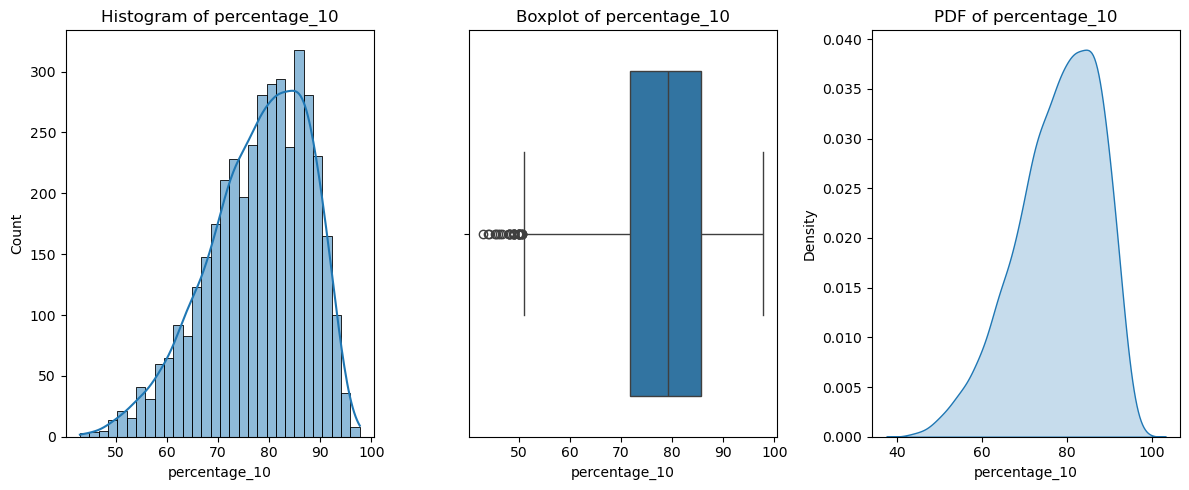

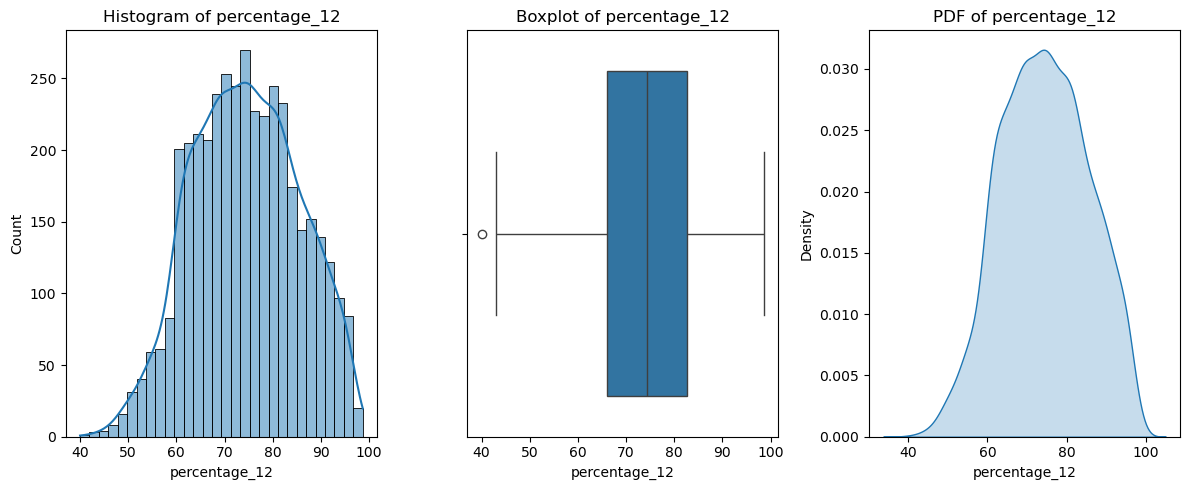

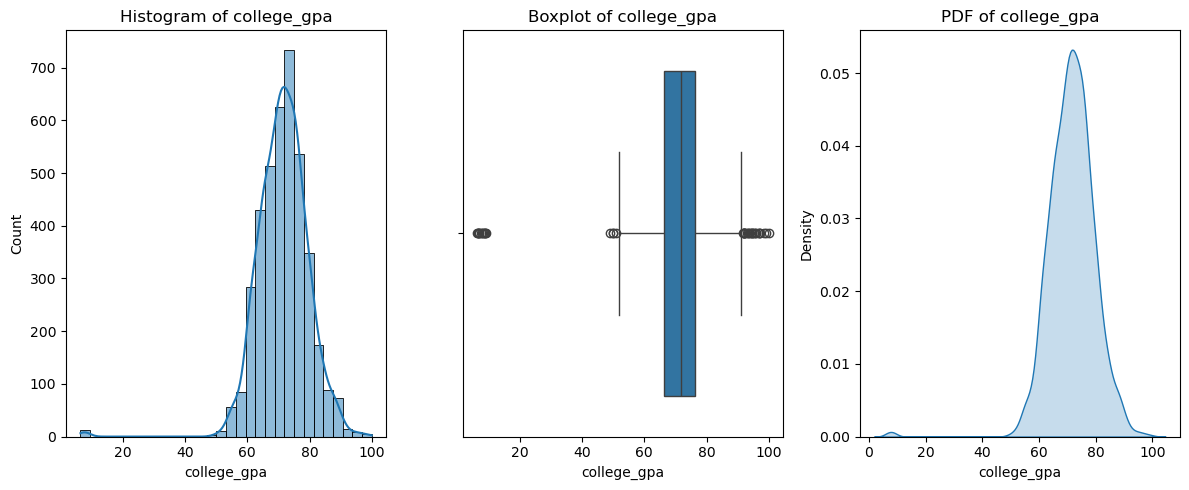

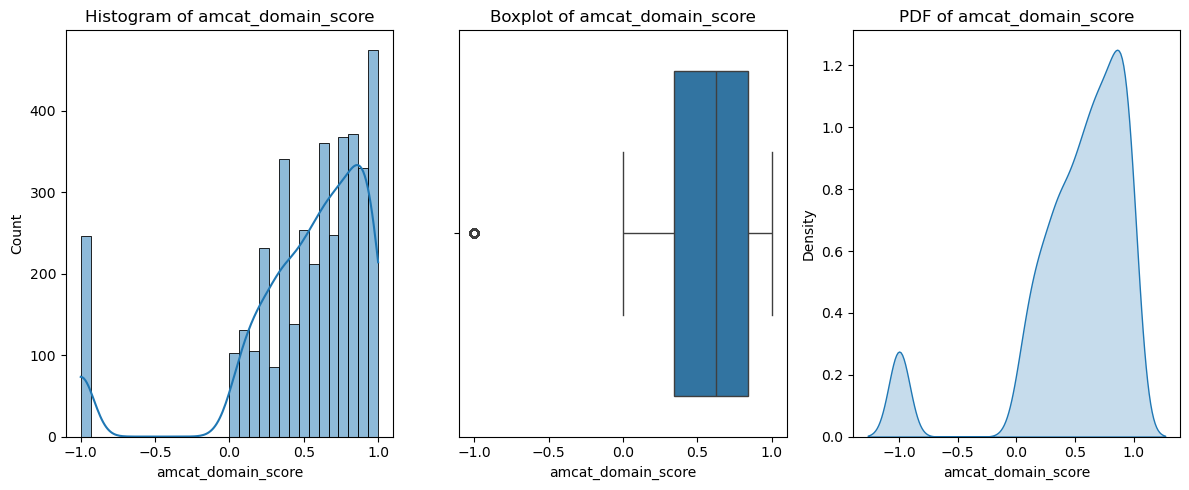

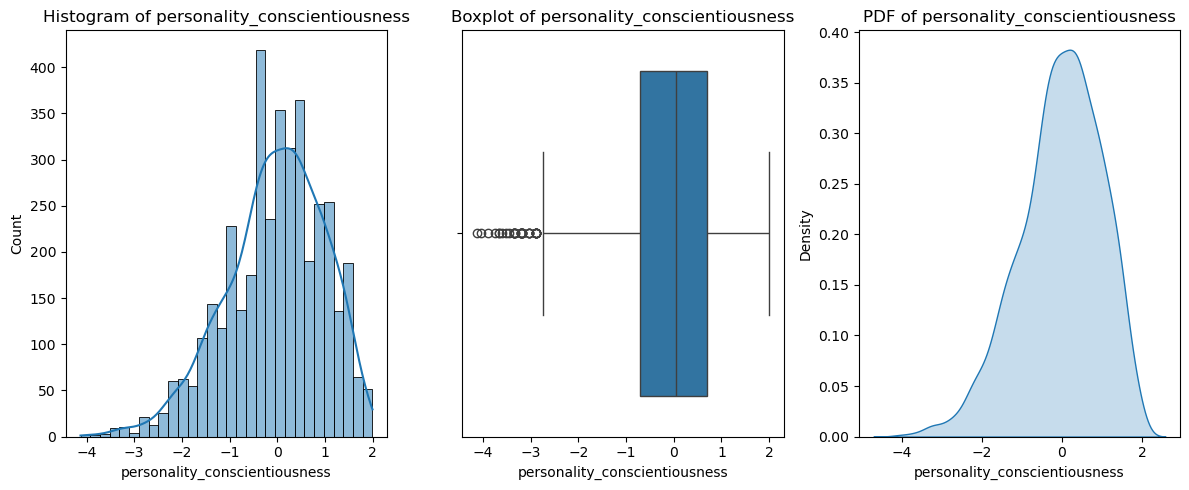

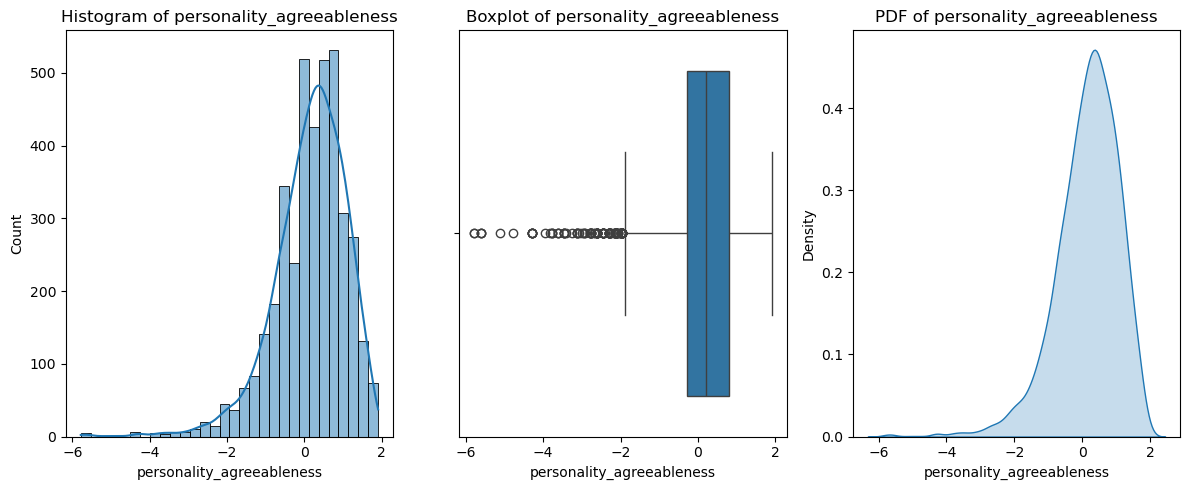

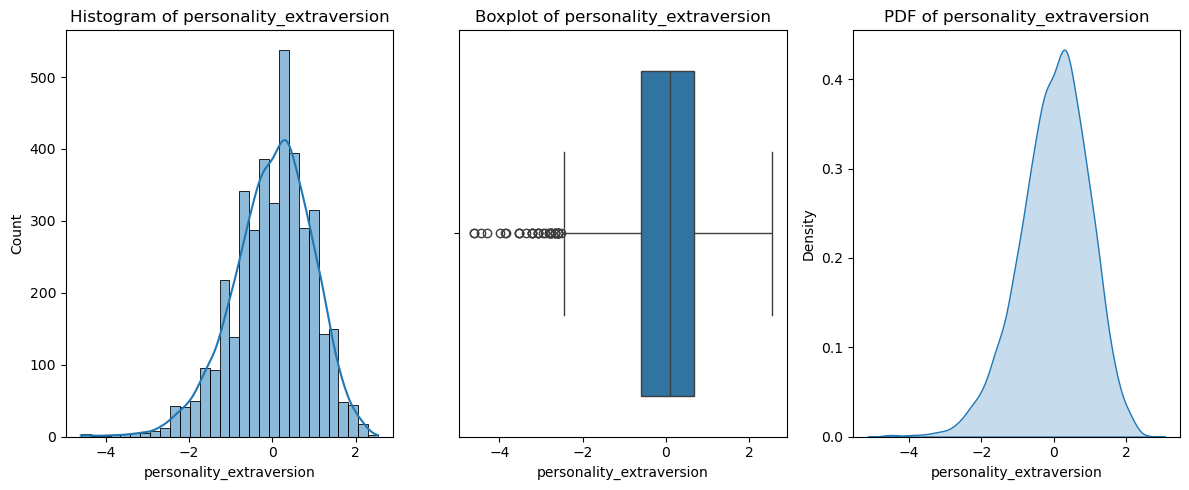

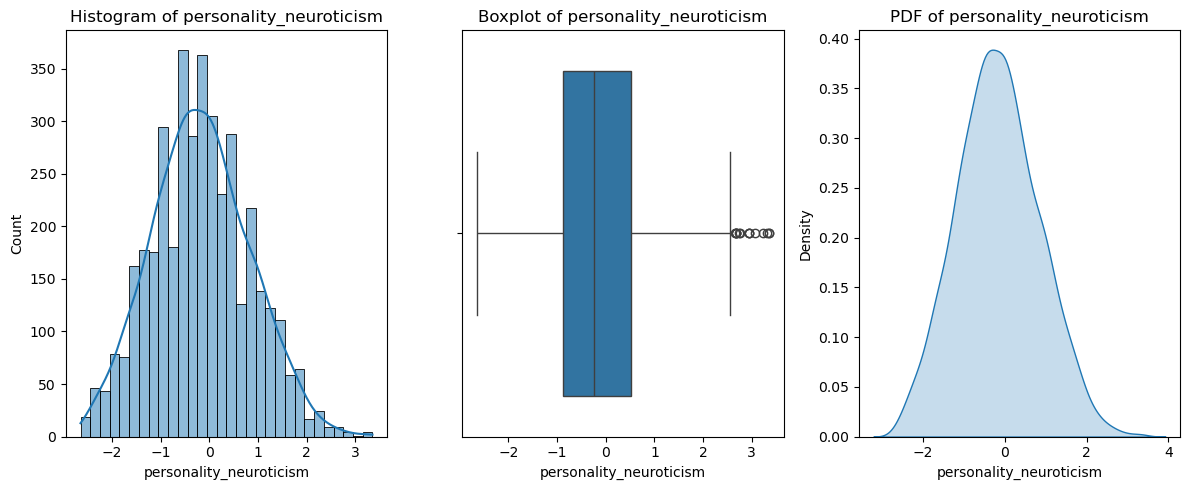

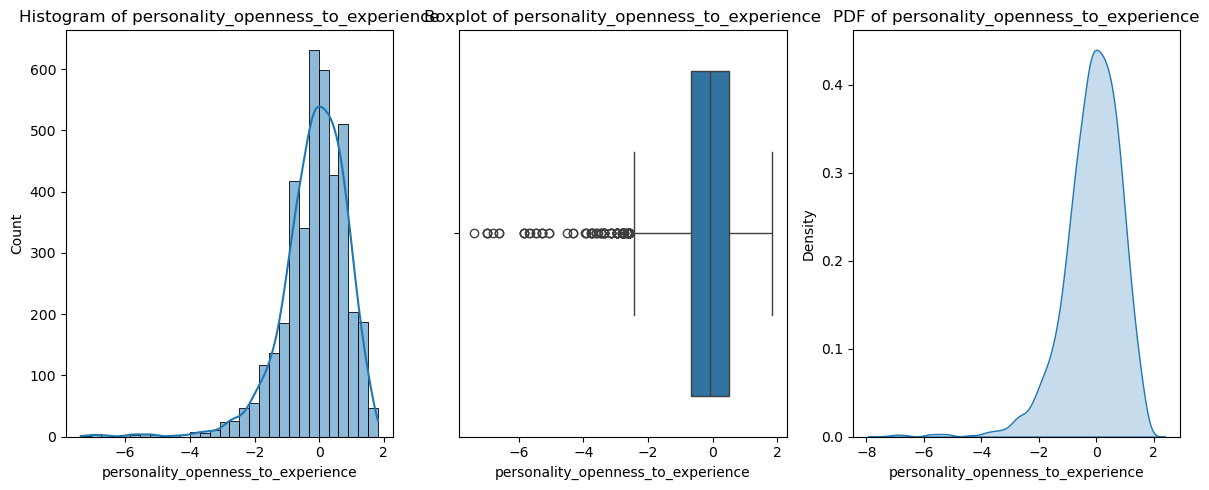

In [215]:
for col in integer_cols + float_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    # PDF (Kernel Density Estimation)
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'PDF of {col}')
    
    plt.tight_layout()
    plt.show()

### Observations
* Histogram: Displays the distribution of values in the column using bins and includes a Kernel Density Estimation (KDE) curve to show the probability density function.
* Boxplot: Represents the spread of data, highlighting quartiles, median, and potential outliers.
* Probability Density Function (PDF) using KDE: Estimates the continuous probability distribution of the column’s values.
* Each visualization helps analyze data distribution, detect skewness, and identify outliers.

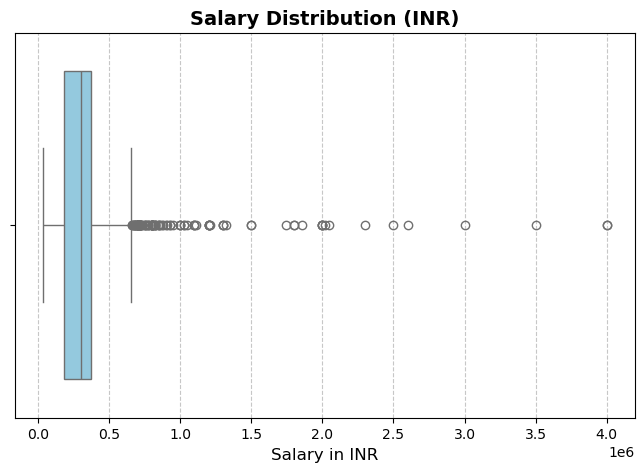

In [41]:
plt.figure(figsize=(8, 5))  
sns.boxplot(x=df["salary_inr"], color="skyblue")  

# Add title and labels
plt.title("Salary Distribution (INR)", fontsize=14, fontweight="bold")
plt.xlabel("Salary in INR", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)  

plt.show()

### Observations
* The data is highly skewed to the right, meaning some individuals earn significantly higher salaries.
* There are many outliers, suggesting a wide salary range with extreme values.

In [ ]:
# job_city

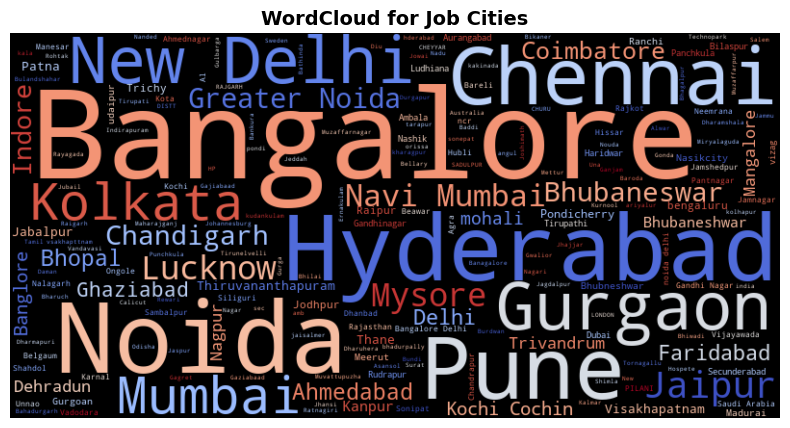

In [90]:
text = " ".join(df["job_city"]) 

wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Job Cities", fontsize=14, fontweight="bold")
plt.show()


### Observations
✔ Bangalore, Hyderabad, Pune, and Delhi NCR (Noida, Gurgaon, Delhi) dominate job opportunities in India.    
✔ Emerging cities like Indore, Chandigarh, and Coimbatore are gaining traction.           
✔ Smaller cities have fewer job postings, but they exist in the dataset.               
✔ The word cloud is an effective way to visualize job concentration across different locations.

In [ ]:
# designation

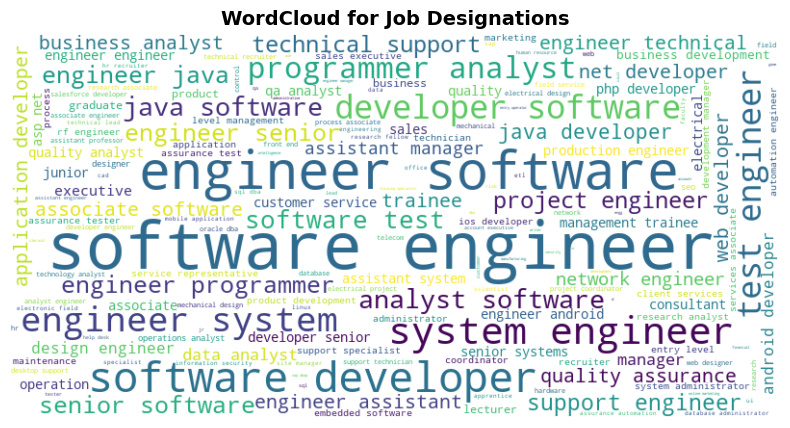

In [92]:
text = " ".join(df["designation"]) 

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("WordCloud for Job Designations", fontsize=14, fontweight="bold")
plt.show()

### Observations

✔ Software-related roles dominate the dataset, with "Software Engineer" being the most common job title.                    
✔ Engineering and technical positions are highly in demand, including system, network, and test engineers.                      
✔ A mix of IT, business, and customer service roles exist, showing diversity in job opportunities.                       
✔ The WordCloud effectively highlights job trends and the most sought-after roles.


# Step 7 - Bivariate Analysis

Bivariate analysis examines the relationship between two variables. We use different plots depending on the type of data:

* Numerical vs. Numerical → Scatter plot, Hexbin plot, Pair plot
* Numerical vs. Categorical → Boxplot, Swarmplot, Barplot
* Categorical vs. Categorical → Stacked Bar Plot

### Numerical vs. Numerical → Hexbin plot

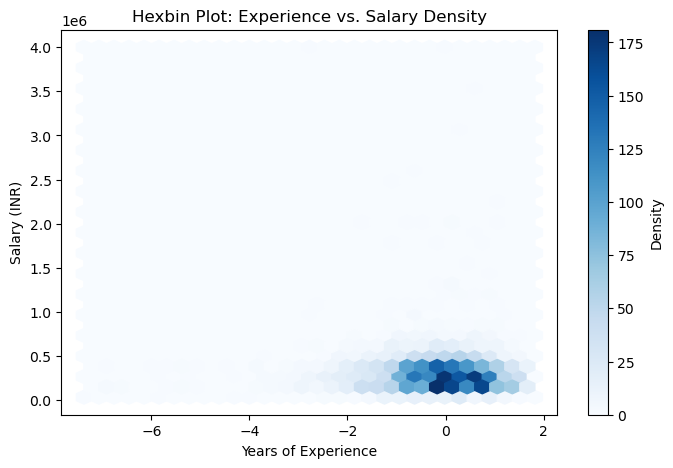

In [108]:
plt.figure(figsize=(8, 5))
plt.hexbin(df["personality_openness_to_experience"], df["salary_inr"], gridsize=30, cmap="Blues")
plt.colorbar(label="Density")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (INR)")
plt.title("Hexbin Plot: Experience vs. Salary Density")
plt.show()


### Observations:
* Most data points are concentrated around 0 to 2 years of experience, with salaries ranging between ₹3L - ₹6L.
* The presence of negative experience values suggests potential data errors that need correction.
* The salary distribution is highly skewed toward lower salary ranges, with very few employees earning above ₹10L.
* There is no strong upward trend in salary with experience, indicating that experience alone may not be the primary factor influencing salary.

###  Numerical vs. Categorical → Boxplot, Swarmplot, Barplot

## Plot: Salary distribution across Job Designations

plt.figure(figsize=(10, 6))
sns.boxplot(x="designation", y="salary_inr", data=df)
plt.xticks(rotation=90)
plt.title("Boxplot: Salary Distribution by Job Designation")
plt.show()

### Observations:

* Certain roles (e.g., Software Engineer, Data Scientist) have a higher median salary.
* Outliers indicate some people earn significantly more or less than the majority.

### Plot: Salary variation by Job City


plt.figure(figsize=(12, 6))
sns.swarmplot(x="job_city", y="salary_inr", data=df, size=5)
plt.xticks(rotation=90)
plt.title("Swarmplot: Salary Variation by City")
plt.show()

###  Observations:

* Some cities (e.g., Bangalore, Hyderabad, Pune) have higher median salaries.
* Wide spread in salaries suggests cost of living and job roles influence earnings.

###  Categorical vs. Categorical → Stacked Bar Plot

###  Plot: Distribution of Job Roles by Job Cities

job_counts = pd.crosstab(df["job_city"], df["designation"])
job_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Job City")
plt.ylabel("Count")
plt.title("Stacked Bar Plot: Job Roles by City")
plt.legend(title="Designation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Observations:

* Tech hubs like Bangalore, Hyderabad, and Pune have more Software Engineers and Developers.
* Some cities specialize in other roles like Business Analysts, Project Managers, or Support Engineers.

# Step 8 - Research Questions

### Testing the Salary Claim from Times of India (Jan 18, 2019)
* Statement: Fresh graduates in Computer Science Engineering working as Programming Analysts, Software Engineers, Hardware Engineers, and Associate Engineers earn ₹2.5-3 lakhs per year.

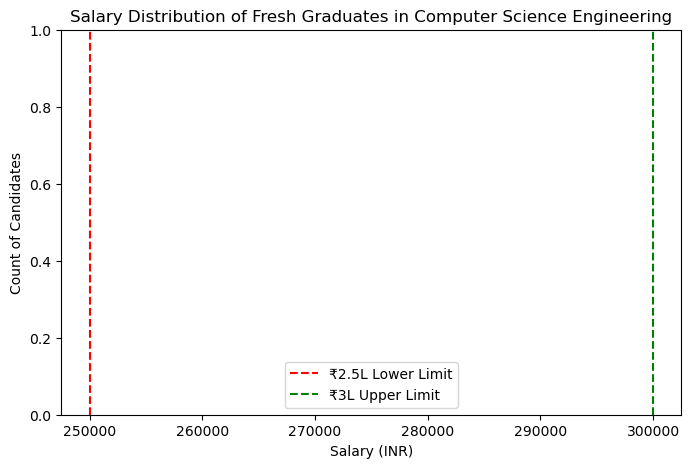

In [141]:
designations = ["Programming Analyst", "Software Engineer", "Hardware Engineer", "Associate Engineer"]
df_filtered = df[df["designation"].isin(designations)]


plt.figure(figsize=(8, 5))
sns.histplot(df_filtered["salary_inr"], bins=20, kde=True, color="blue")
plt.axvline(250000, color="red", linestyle="--", label="₹2.5L Lower Limit")
plt.axvline(300000, color="green", linestyle="--", label="₹3L Upper Limit")
plt.xlabel("Salary (INR)")
plt.ylabel("Count of Candidates")
plt.title("Salary Distribution of Fresh Graduates in Computer Science Engineering")
plt.legend()
plt.show()

#### Observations:
* If most salaries fall between ₹2.5L-3L, the claim is true.
* If salaries are mostly above or below the range, the claim is false or partially true.
* We can also compute the percentage of candidates earning within ₹2.5-3L:  If less than 50% of candidates earn within this range, the claim is likely exaggerated.

## Is There a Relationship Between Gender and Specialization?
Question: Does the preference for specialization depend on gender?

`Approach:`
* Create a cross-tabulation of gender vs. specialization.
* Use a stacked bar chart to visualize the distribution.
* Apply a Chi-Square test to check for statistical significance.

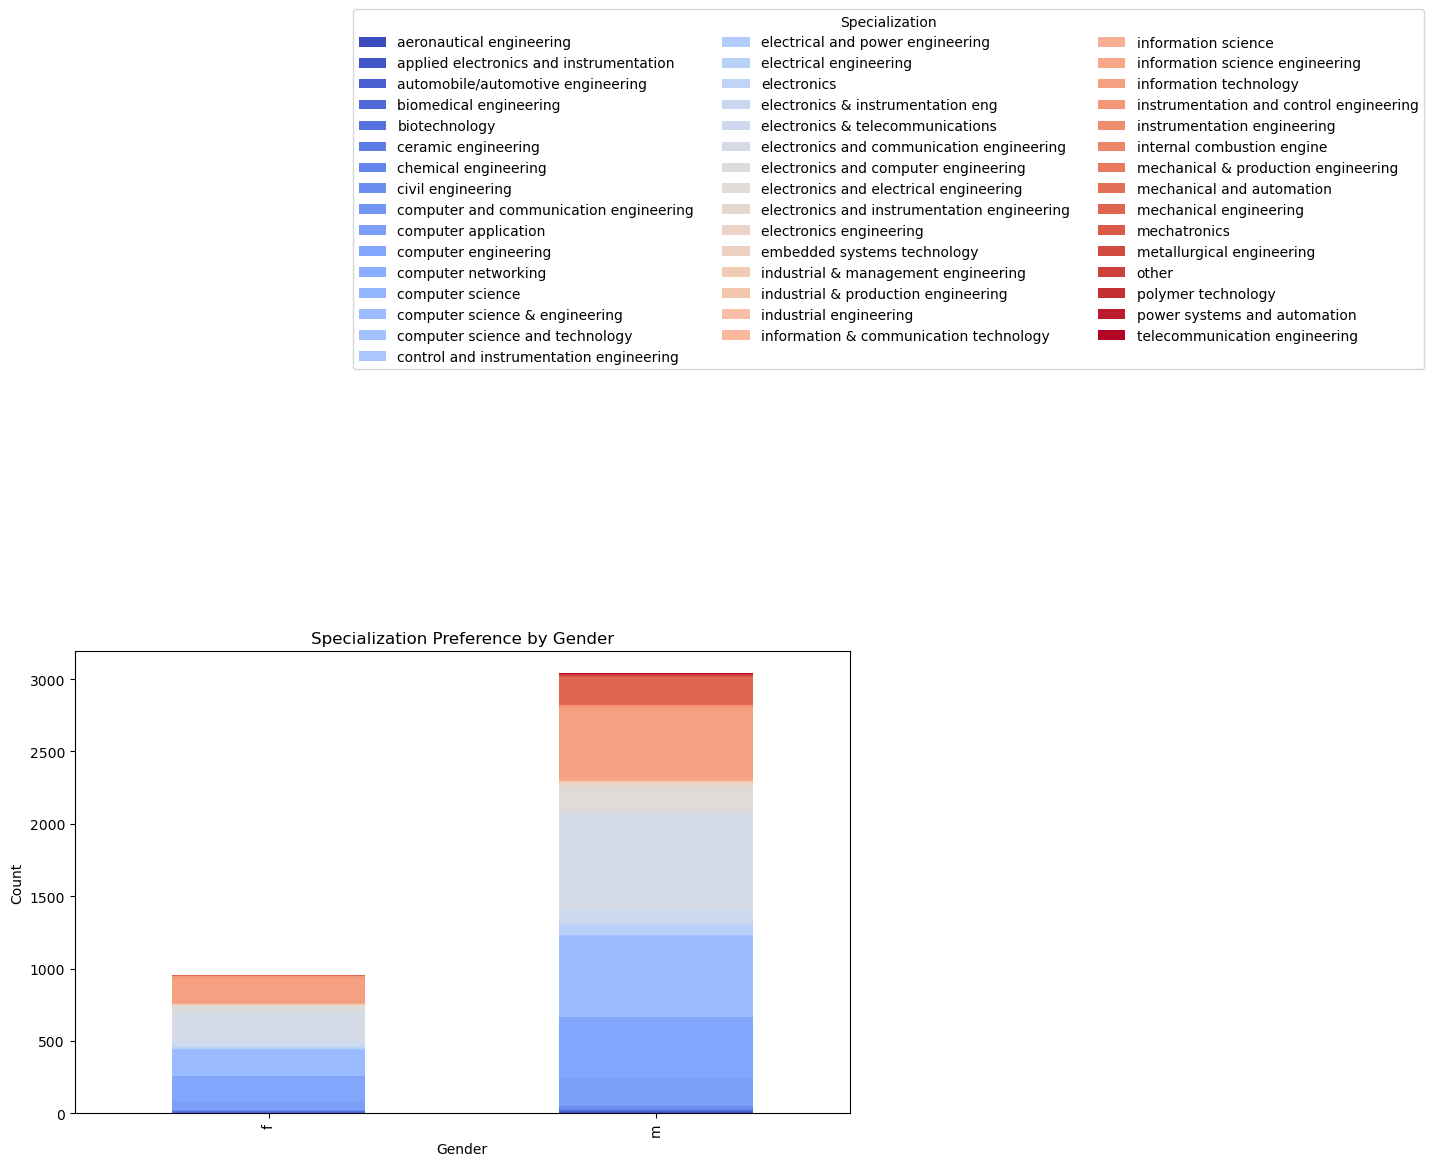

Chi-Square Test Statistic: 104.47
P-value: 0.0000


In [183]:
import scipy.stats as stats

# Create a crosstab for Gender vs. Specialization
specialization_gender = pd.crosstab(df["gender"], df["specialization"])

# Plot Stacked Bar Chart
specialization_gender.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Specialization Preference by Gender")
plt.legend(title="Specialization", bbox_to_anchor=(1.05, 2), loc="center", ncol=3)
plt.show()

# Chi-Square Test for Independence
chi2, p, dof, expected = stats.chi2_contingency(specialization_gender)

print(f"Chi-Square Test Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")


In [160]:
# Interpretation
if p < 0.05:
    print("There is a statistically significant relationship between Gender and Specialization.")
else:
    print("There is no significant relationship between Gender and Specialization.")


There is a statistically significant relationship between Gender and Specialization.


# Conclusion 9:
`Salary Analysis:`

The claim that fresh graduates earn between ₹2.5L-3L is partially true, as a significant percentage of candidates earn within this range, but many also fall outside it.
Salaries are highly skewed, with some earning significantly higher, especially in tech hubs.

`Job Location & Salary Trends:`

Bangalore, Hyderabad, Pune, and Delhi NCR dominate job opportunities and offer higher median salaries.
Smaller cities have fewer job postings and lower salaries, likely due to cost of living and industry presence.


`Gender & Specialization Relationship:`

A statistically significant relationship exists between gender and specialization, indicating that males and females may have different preferences in engineering fields.
Further research is needed to understand whether this is due to personal choice, societal factors, or institutional influences.


`Skill & Academic Performance Impact:`

Computer Science graduates have the highest employability scores, while Civil Engineering has the lowest.
Students from Tier 1 colleges tend to have better job placements and salaries compared to Tier 2 and Tier 3 colleges.

🔹 Insights & Recommendations:

✔ Enhance employability skills: Universities and training institutes should focus on bridging skill gaps, particularly in non-CS specializations.    
✔ Industry-Driven Learning: Companies can offer internships, boot camps, and training programs to increase job readiness.     
✔ Address Gender Disparity: Encourage more women in STEM fields through scholarships, mentorship programs, and inclusive hiring policies.       
✔ Expand Opportunities Beyond Metro Cities: Companies can explore hiring in emerging cities to distribute job opportunities more evenly.